### Imports

In [1]:
# TODO: Update for tf 2.0
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


### Global Variables

In [0]:
# The batch size by which the training data is fed into the network.
BATCH_TRAINING = 2

# The function used to evaluate performace of the model and tune the parameters.
LOSS_FUNCTION = tf.keras.losses.BinaryCrossentropy()

# The function by which your models parameters are adjusted to seek a local minimum.
# OPTIMIZER = adjusted within the network functions

# The rate at which the optimizer seeks the local minimum.
LEARNING_RATE = 1

# The number of iterations for which the model is trained.
EPOCHS = 20

### Load the Dataset

In [3]:
# Import dataset from relevant source(s).
# TODO: Import normalized data from Cora and Fatimah.
# TODO: Load full dataset, including embedding features.
bankrupt = 'https://raw.githubusercontent.com/shrnkm/bankruptcy/master/data/Eikon/small_test_sets/data_test_bankrupt.csv?token=AGV7MSYDPC5VTFWFYCHH2NC54TTUU'
healthy = 'https://raw.githubusercontent.com/shrnkm/bankruptcy/master/data/Eikon/small_test_sets/data_test_healthy.csv?token=AGV7MS4YUG4JXQ34EHSXNV254TTYO'
df_mixed = pd.concat([pd.read_csv(bankrupt), pd.read_csv(healthy)])
np.random.seed(0)

# Split data based on years (80% of all years for training, 20% for testing).
split = 20 * 0.8
split_idx = 2000 + split
train_data = np.array(df_mixed.loc[df_mixed['Year'] <= split_idx].values)
train_labels = np.array(df_mixed.loc[df_mixed['Year'] <= split_idx]['Bankrupt'].values)
test_data = np.array(df_mixed.loc[df_mixed['Year'] > split_idx].values)
test_labels = np.array(df_mixed.loc[df_mixed['Year'] > split_idx]['Bankrupt'].values)
print("\nSplit after year {}".format(split))

# Drop irrelevant columns (years, instrument).
train_data = np.delete(train_data, 0, axis=1)
train_data = np.delete(train_data, -2, axis=1)
print("Length train data: {}, Length test data: {}".format(len(train_data), len(test_data)))


Split after year 16.0
Length train data: 3349, Length test data: 591


### Investigate the Dataset

In [4]:
# Print relevant information about the dataset(s) structure.
print("Number of training instruments: {}\nNumber of test instruments:{}".format(len(train_data), len(test_data)))
print("Shape of one instrument datapoint: {}".format(train_data[0].shape))

Number of training instruments: 3349
Number of test instruments:591
Shape of one instrument datapoint: (22,)


### Visualize the Dataset

In [5]:
# Visualize specific examples from the dataset to gain understanding of what each datapoint is composed.
print("Example instrument:\n\n{}".format(df_mixed.loc[0]))

Example instrument:

   Instrument   Total Debt  ...  Year  Bankrupt
0     1071645  151023000.0  ...  2000         1
0     1000229   89686000.0  ...  2000         0

[2 rows x 24 columns]


### Build the TensorFlow Dataset

In [6]:
# Network variables.
num_features = train_data[0].shape[0]
num_inputs = int(split)

# Initialize the time-series generators.
train_generator = TimeseriesGenerator(train_data, train_labels, length=num_inputs, batch_size=BATCH_TRAINING, stride=num_inputs+1, shuffle=True)
test_generator = TimeseriesGenerator(test_data, test_labels, length=num_inputs)

# Visualize the newly created generator.
print('Number of samples: {}'.format(len(train_generator)))
print('Number of samples in first input pass: {}'.format(len(train_generator[0])))

Number of samples: 99
Number of samples in first input pass: 2


### Build the Model(s)

In [0]:
# Instantiate functions for each desired network architecture.

# TODO: Test different network architectures and layer types. Compare results.
# TODO: Test different optimizers.

# Standard NN based on Mai et al.
def NN_Standard(input_shape):
    print('Shape: ', input_shape)
    model = Sequential()
    model.add(Dense(4, input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss=LOSS_FUNCTION,
                  # TODO: ROC Score
                  metrics=['accuracy'])

    return model


# A deep NN.
def NN_Deep(input_shape):
    print('Shape: ', input_shape)
    model = Sequential()
    model.add(Dense(4, input_shape=input_shape))
    model.add(Dense(4, input_shape=input_shape))
    model.add(Dense(4, input_shape=input_shape))
    model.add(Dense(4, input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss=LOSS_FUNCTION,
                  # TODO: ROC Score
                  metrics=['accuracy'])

    return model

# A wide NN.
def NN_Wide(input_shape):
    print('Shape: ', input_shape)
    model = Sequential()
    model.add(Dense(22, input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss=LOSS_FUNCTION,
                  # TODO: ROC Score
                  metrics=['accuracy'])

    return model

### Train the model.

In [8]:
# Clear the session.
tf.keras.backend.clear_session()

# Initialize the selected model.
model = NN_Standard((num_inputs, num_features))
# model = NN_Deep((num_inputs, num_features))
# model = NN_Wide((num_inputs, num_features))

# Print details of the model.
model.summary()

# Train for appropriate number of epochs.
history = model.fit_generator(train_generator, epochs=EPOCHS)

Shape:  (16, 22)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16, 4)             92        
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________



Epoch 1/20





99/99 [==============================] - 1s 13ms/step - loss: 14371412478.1111 - acc: 0.2879
Epoch 2/20
99/99 [==============================] - 0s 4ms/step - loss: 1073362553.4741 - acc: 0.5707
Epoch 3/20
99/99 [==============================] - 0s 3m

### Visualize the Training Process

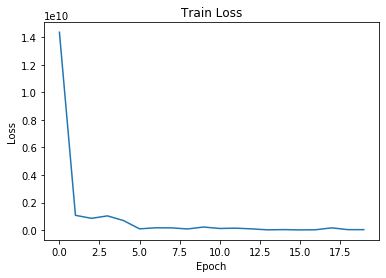

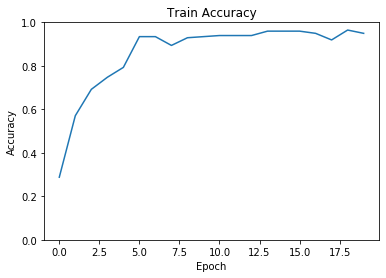

In [9]:
# Visualize evaluation measures for training and test data. 
# TODO: Plot precision and ROC.

# Plot train and test loss.
plt.plot(history.history['loss'])
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Plot test accuracy.
plt.plot(history.history['acc'])
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.show()

### Evaluate Models on Test Data

In [0]:
# TODO